### Compare Fragmenstein and XCOS scores

In [1]:
from rdkit import Chem
import pandas as pd
import numpy as np
# Import Matteo's Fragmenstein data Pandastools was being an arse....
frag_sd = Chem.SDMolSupplier('in_data/compare_xcos_fragmenstein/Fragmenstein_permissive_rescored_20200609.sdf')

In [2]:
frag_results = []
for mol in frag_sd:
    try:
        frag_results.append((mol.GetProp('_Name'),mol.GetProp('∆∆G'),mol.GetProp('%Rank'),mol.GetProp('comRMSD')))
    except:
        continue

frag_df = pd.DataFrame(frag_results[1:],columns=['Name','DeltaG','Rank','comRMSD'])


In [3]:
frag_df.head()

,Name,DeltaG,Rank,comRMSD
0,FRA-DIA-8640f307-1,-15.551701,0.014188,0.62586
1,FRA-DIA-8640f307-2,-14.355297,0.028377,0.855771
2,SIM-SYN-a98e6a07-1,-11.046305,0.042565,0.45284
3,DAV-CRI-f9b12666-9-nitrile,-11.238756,0.056754,0.853052
4,DAV-CRI-f9b12666-8-nitrile,-12.12691,0.070942,0.753703


In [4]:
# Import XCOS data
xcos_sd = Chem.SDMolSupplier('in_data/compare_xcos_fragmenstein/xCOS_Teo_2020-07-07.sdf')

In [5]:
xcos_results = []
for mol in xcos_sd:
    try:
        xcos_results.append((mol.GetProp('_Name'),mol.GetProp('Score_1'),mol.GetProp('Score_2'),mol.GetProp('Score_3')))
    except:
        continue
xcos_df = pd.DataFrame(xcos_results[1:],columns=['Name','Score1','Score2','Score3'])

In [6]:
xcos_df.head()

,Name,Score1,Score2,Score3
0,FRA-DIA-8640f307-1,47.7377,4.3646,0.0914
1,FRA-DIA-8640f307-2,45.9998,3.4171,0.0743
2,SIM-SYN-a98e6a07-1,39.4837,2.4818,0.0629
3,DAV-CRI-f9b12666-9-nitrile,41.7550,3.3404,0.0800
4,DAV-CRI-f9b12666-8-nitrile,41.1029,3.0534,0.0743


In [31]:
# Merge two datasets
compare_df = pd.merge(xcos_df, frag_df, how='inner', on=['Name', 'Name'])

In [32]:
len(compare_df)

7675

In [33]:
compare_df.head()

,Name,Score1,Score2,Score3,DeltaG,Rank,comRMSD
0,FRA-DIA-8640f307-1,47.7377,4.3646,0.0914,-15.551701,0.014188,0.62586
1,FRA-DIA-8640f307-2,45.9998,3.4171,0.0743,-14.355297,0.028377,0.855771
2,SIM-SYN-a98e6a07-1,39.4837,2.4818,0.0629,-11.046305,0.042565,0.45284
3,DAV-CRI-f9b12666-9-nitrile,41.7550,3.3404,0.0800,-11.238756,0.056754,0.853052
4,DAV-CRI-f9b12666-8-nitrile,41.1029,3.0534,0.0743,-12.12691,0.070942,0.753703


In [34]:
# Need to get rid of nasty nan
compare_df = compare_df[~compare_df.DeltaG.str.contains("nan")]
compare_df = compare_df[~compare_df.comRMSD.str.contains("nan")]
compare_df = compare_df[~compare_df.Rank.str.contains("nan")]

In [35]:
len(compare_df)

7048

In [36]:
compare_df.dtypes

Name       object
Score1     object
Score2     object
Score3     object
DeltaG     object
Rank       object
comRMSD    object
dtype: object

In [37]:
compare_df.Rank=pd.to_numeric(compare_df.Rank)
compare_df.DeltaG=pd.to_numeric(compare_df.DeltaG)
compare_df.comRMSD=pd.to_numeric(compare_df.comRMSD)
compare_df.Score1=pd.to_numeric(compare_df.Score1)
compare_df.Score2=pd.to_numeric(compare_df.Score2)
compare_df.Score3=pd.to_numeric(compare_df.Score3)

In [38]:
compare_df.dtypes

Name        object
Score1     float64
Score2     float64
Score3     float64
DeltaG     float64
Rank       float64
comRMSD    float64
dtype: object

In [39]:
# Corr when all the data is used?
np.corrcoef(compare_df.Score1,compare_df.Rank)

array([[ 1.        , -0.14466741],
       [-0.14466741,  1.        ]])

In [40]:
# Let's only llok at Delta G values less than 0
compare_df = compare_df[compare_df['Score1']>30]

In [41]:
# Corr when top ranking data is used?
np.corrcoef(compare_df.Score1,compare_df.Rank)

array([[ 1.        , -0.11960136],
       [-0.11960136,  1.        ]])

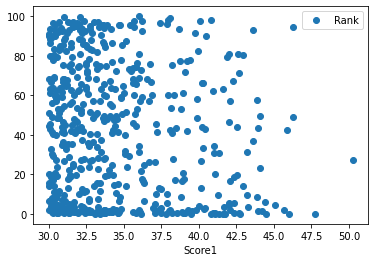

In [42]:
# Compare delat G tp Score1
compare_df.plot(x='Score1', y='Rank', style='o')